In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 6.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 8.9 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 7.0 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
data = pd.read_csv('data/sep/factory_2000_3002_4010_1054.csv')
data['过账日期'] = pd.to_datetime(data['过账日期'])
print('数据基本信息：')
data.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45415 entries, 0 to 45414
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   过账日期    45415 non-null  datetime64[ns]
 1   需求量     45415 non-null  float64       
 2   工厂编码    45415 non-null  int64         
 3   物料编码    45415 non-null  int64         
 4   物料品牌    45415 non-null  int64         
 5   物料类型    45415 non-null  int64         
 6   物料品类    45415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.4 MB


In [6]:
data.head()

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
0,2018-01-02,4.65,2000,1054,5001,3002,4010
1,2018-01-02,2.99,2000,1054,5001,3002,4010
2,2018-01-02,3.36,2000,1054,5001,3002,4010
3,2018-01-02,3.06,2000,1054,5001,3002,4010
4,2018-01-02,2.85,2000,1054,5001,3002,4010


In [10]:
# 检查过账日期列是否有重复值
has_duplicates = data['过账日期'].duplicated().any()

if has_duplicates:
    print("过账日期列存在重复值。")
    
    # 获取所有重复日期（包含首次出现的完整数据）
    duplicated_data = data[data['过账日期'].duplicated(keep=False)]
    
    # 统计每个重复日期的出现次数
    date_counts = duplicated_data['过账日期'].value_counts().reset_index()
    date_counts.columns = ['日期', '重复次数']
    
    print("\n重复日期详情：")
    print(date_counts.to_string(index=False))
    
else:
    print("过账日期列不存在重复值。")

过账日期列存在重复值。

重复日期详情：
        日期  重复次数
2018-10-31   146
2020-10-31   146
2020-06-30   138
2018-06-30   138
2020-07-11   137
2018-09-21   137
2020-09-21   137
2018-07-11   137
2018-11-29   137
2018-11-30   132
2020-10-04   132
2018-10-04   132
2018-09-08   129
2020-09-08   129
2018-11-15   125
2020-11-15   125
2020-05-31   124
2018-05-31   124
2018-06-29   120
2020-06-29   120
2020-10-24   120
2018-10-24   120
2020-09-30   117
2018-09-30   117
2020-03-31   115
2020-10-22   115
2018-10-22   115
2018-03-31   115
2018-07-31   112
2020-07-31   112
2018-07-12   112
2020-07-12   112
2018-11-18   111
2020-11-18   111
2020-09-20   110
2018-09-20   110
2020-09-16   110
2018-09-16   110
2018-10-03   110
2020-10-03   110
2018-09-28   107
2020-09-28   107
2020-04-29   107
2018-04-29   107
2020-11-12   104
2020-09-09   104
2018-10-27   104
2020-10-27   104
2020-10-28   104
2018-09-09   104
2018-09-19   104
2020-09-19   104
2018-11-12   104
2018-10-28   104
2020-11-08   102
2018-10-20   102
2020-11-10

In [11]:
columns_to_keep = ['过账日期', '需求量']
data = data[columns_to_keep]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45415 entries, 0 to 45414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   过账日期    45415 non-null  datetime64[ns]
 1   需求量     45415 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 709.7 KB


In [13]:
data.head()

,过账日期,需求量
0,2018-01-02,4.65
1,2018-01-02,2.99
2,2018-01-02,3.36
3,2018-01-02,3.06
4,2018-01-02,2.85


In [14]:
data.describe()

,过账日期,需求量
count,45415,45415.000000
mean,2019-07-09 18:46:38.035891200,2.329907
min,2018-01-02 00:00:00,0.000000
25%,2018-08-30 00:00:00,0.060000
50%,2019-06-18 00:00:00,0.750000
75%,2020-06-13 00:00:00,3.200000
max,2020-11-24 00:00:00,53.600000
std,NaN,3.669296


In [15]:
# 按过账日期进行排序
data = data.sort_values(by='过账日期')

# 重置索引
data = data.reset_index(drop=True)

# 计算相邻行过账日期之间的间隔
data['日期间隔'] = data['过账日期'].diff()

# 统计日期间隔的分布
interval_counts = data['日期间隔'].value_counts()

print('日期间隔统计：')
print(interval_counts)

日期间隔统计：
日期间隔
0 days    44387
1 days     1004
2 days       19
4 days        3
3 days        1
Name: count, dtype: int64


In [16]:
# 按过账日期分组，对除过账日期外的其他列取均值
columns_to_aggregate = [col for col in data.columns if col != '过账日期']
aggregated_data = data.groupby('过账日期')[columns_to_aggregate].mean()

# 重置索引，让过账日期成为普通列
aggregated_data = aggregated_data.reset_index()

# 按过账日期进行排序
data = aggregated_data

# 重置索引
data = data.reset_index(drop=True)

# 计算相邻两行过账日期之间的间隔
data['日期间隔'] = data['过账日期'].diff()

# 统计日期间隔的分布
interval_counts = data['日期间隔'].value_counts()

print("日期间隔统计：")
print(interval_counts)

日期间隔统计：
日期间隔
1 days    1004
2 days      19
4 days       3
3 days       1
Name: count, dtype: int64


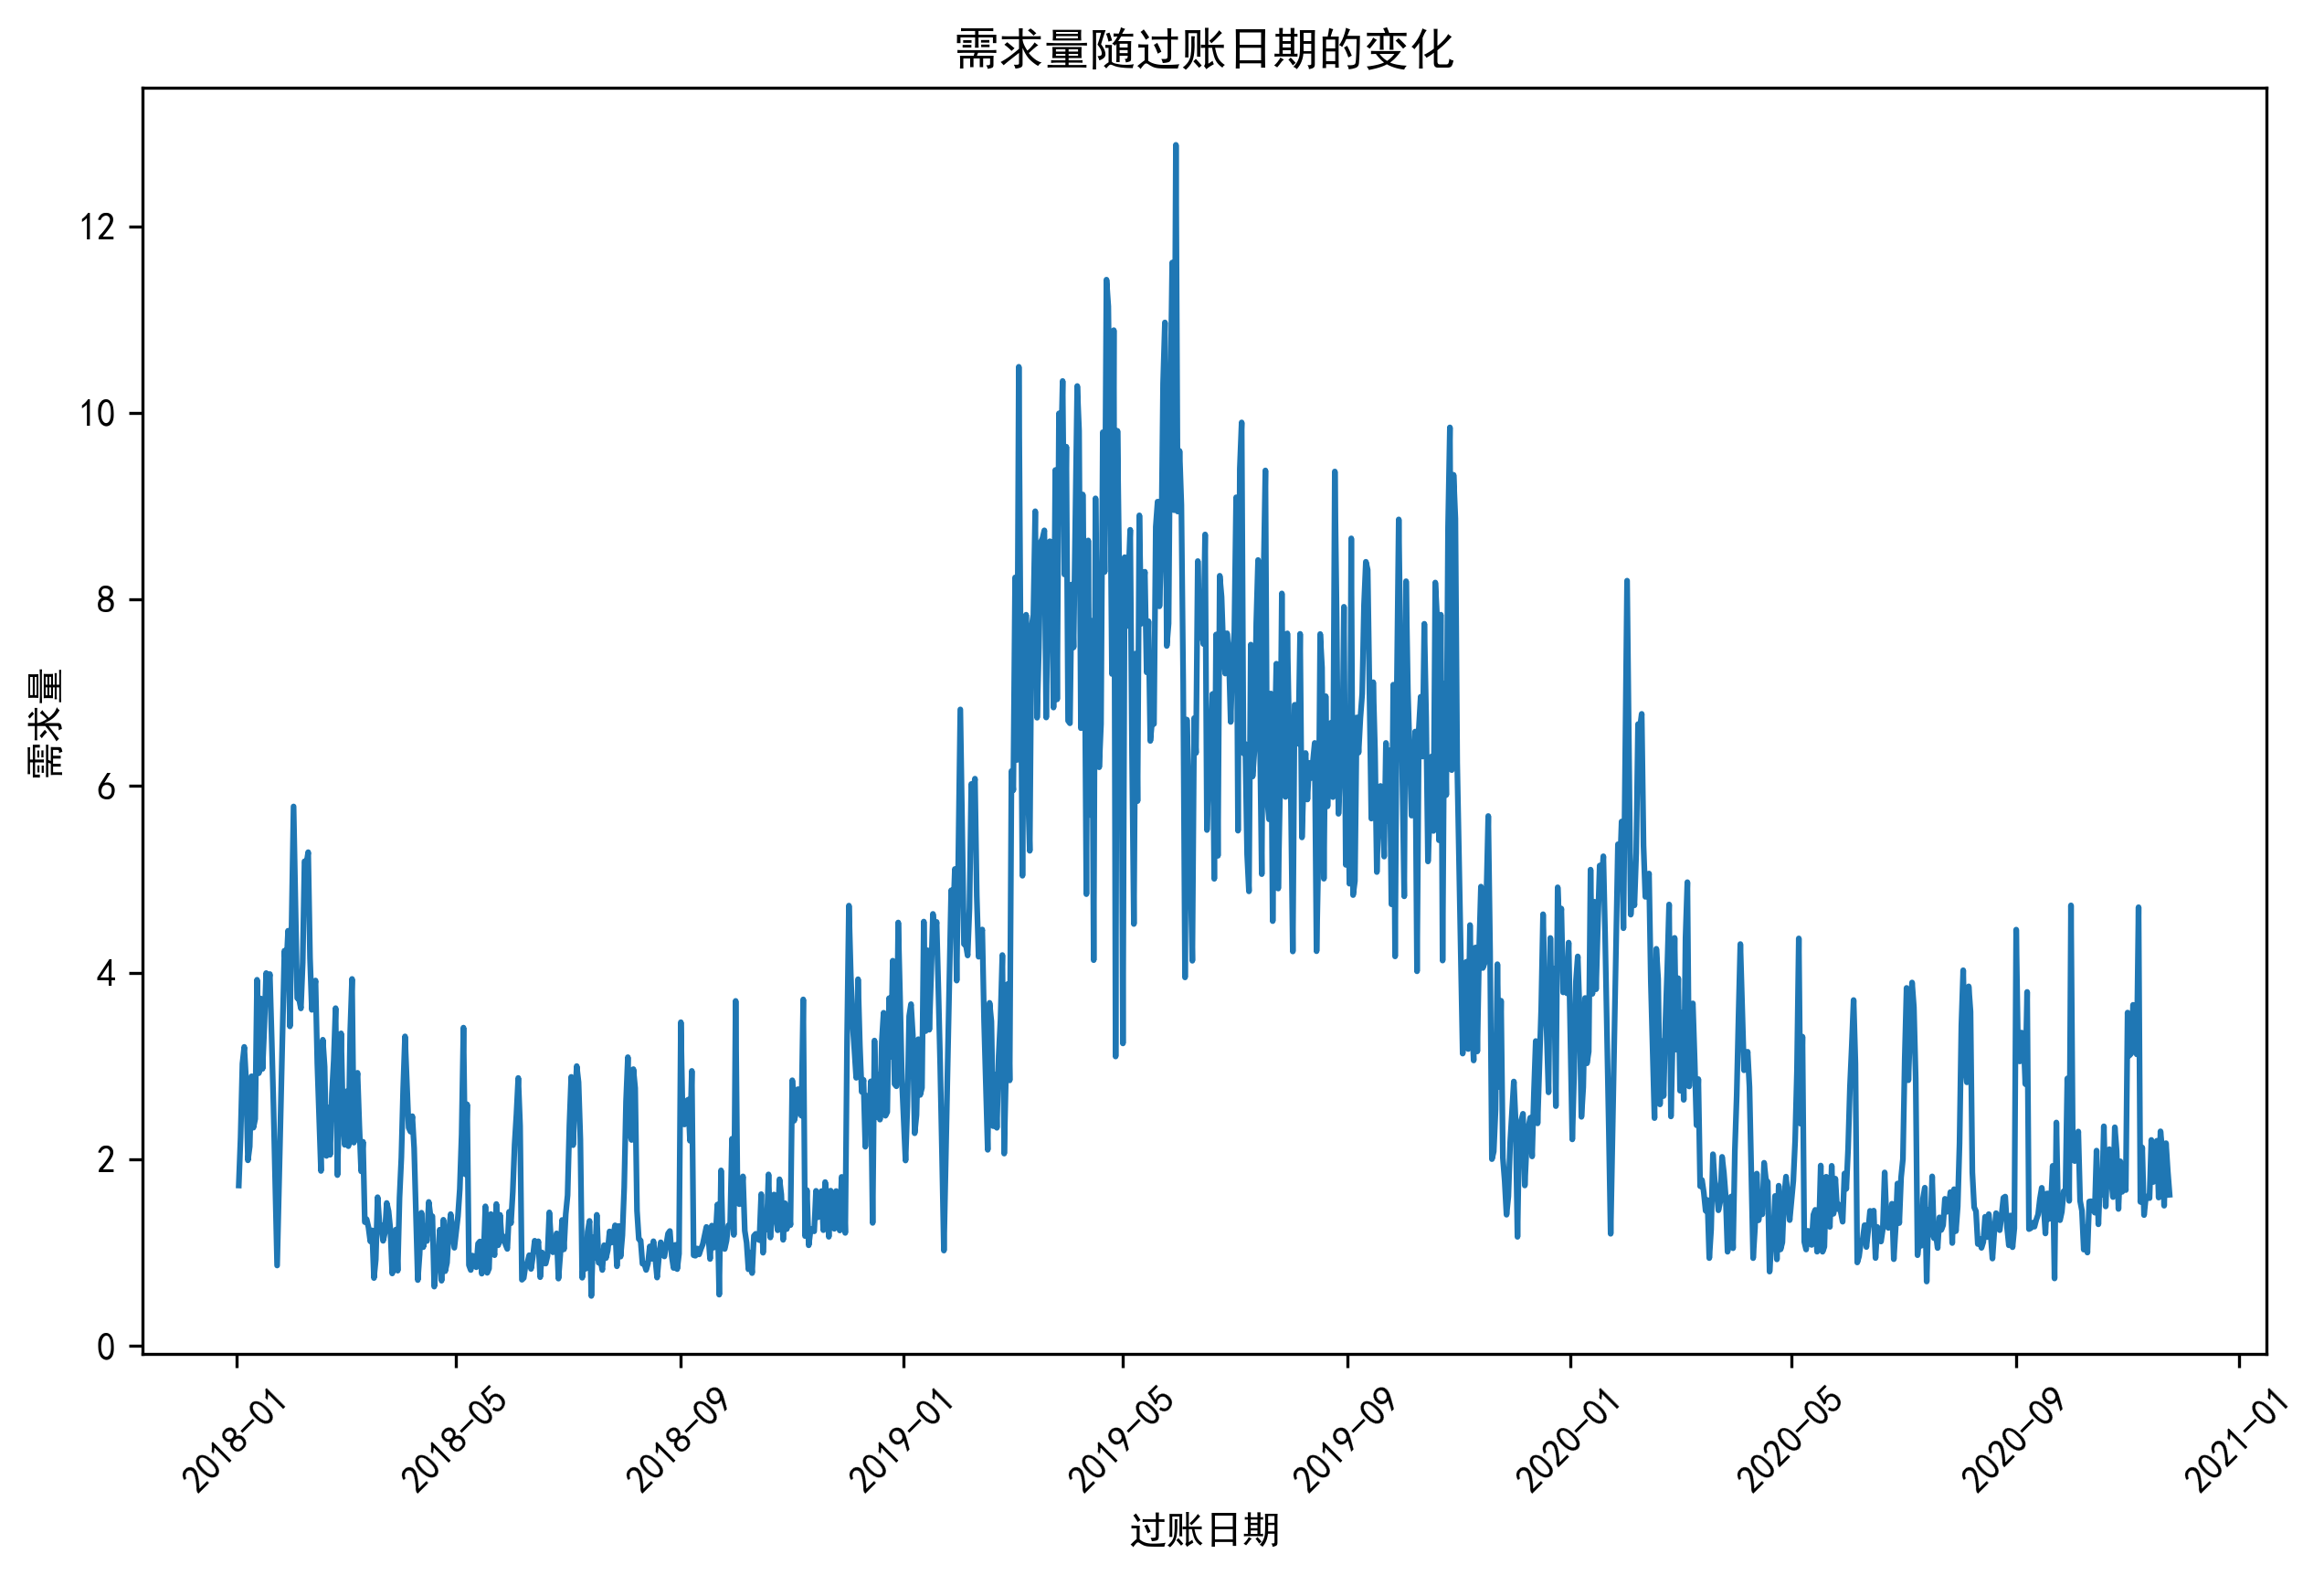

In [18]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 注意：字体名称可能存在拼写错误
plt.rcParams['axes.unicode_minus'] = False

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(data['过账日期'], data['需求量'])
plt.title('需求量随过账日期的变化')
plt.xlabel('过账日期')
plt.ylabel('需求量')
plt.xticks(rotation=45)
plt.show()

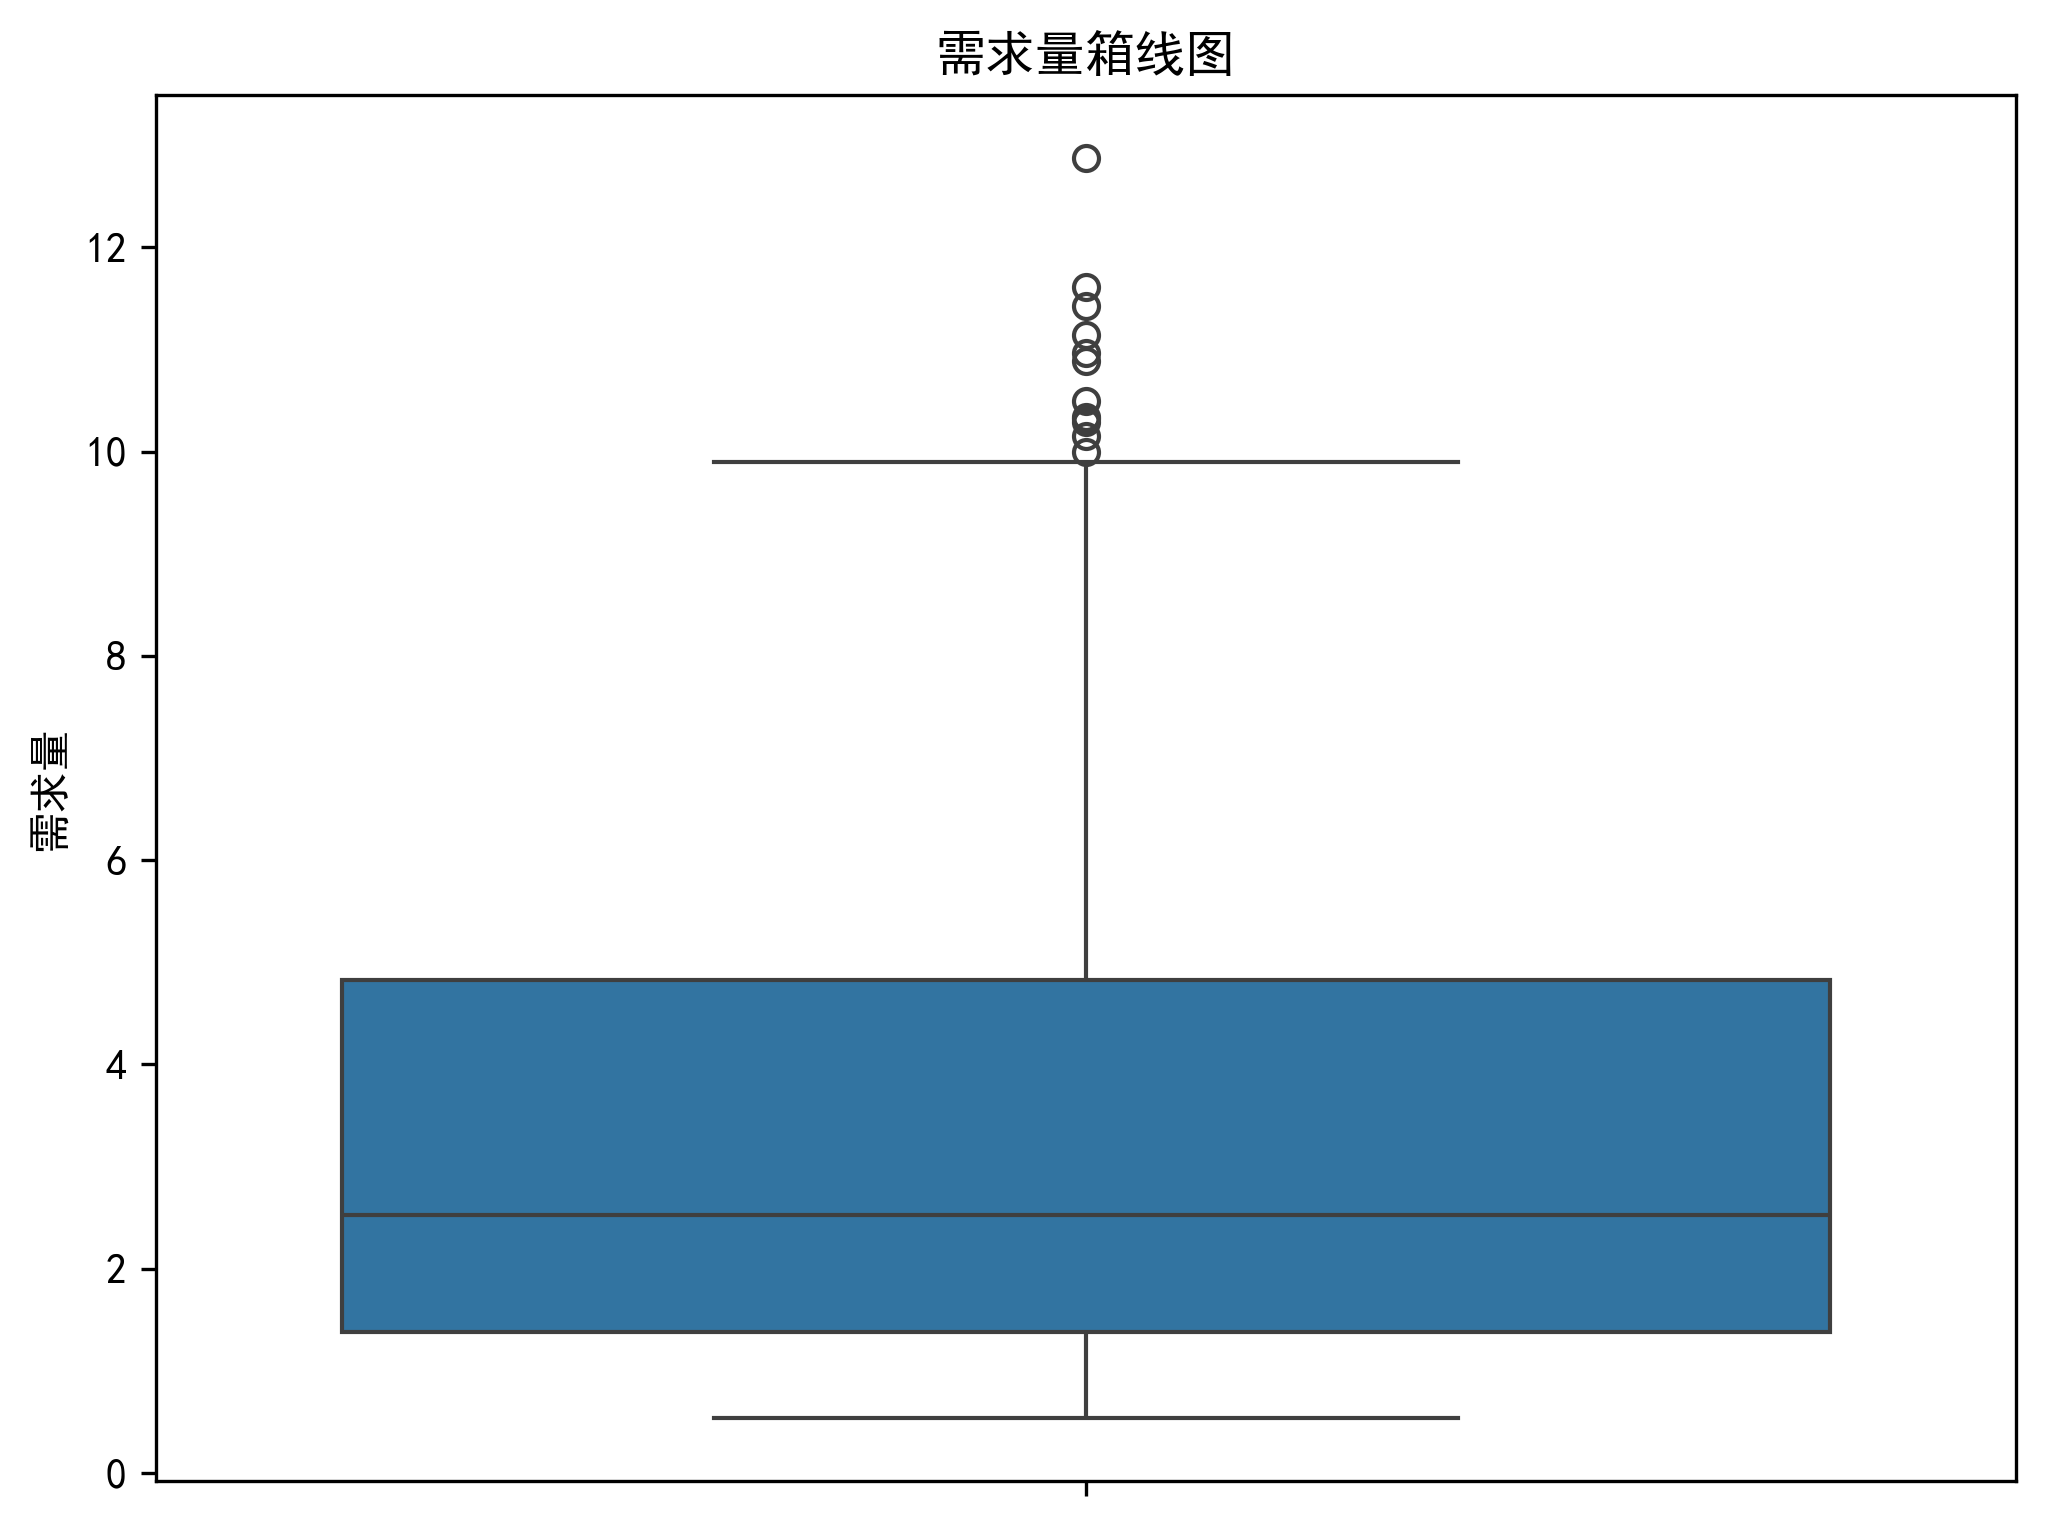

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data['需求量'])
plt.title('需求量箱线图')
plt.show()

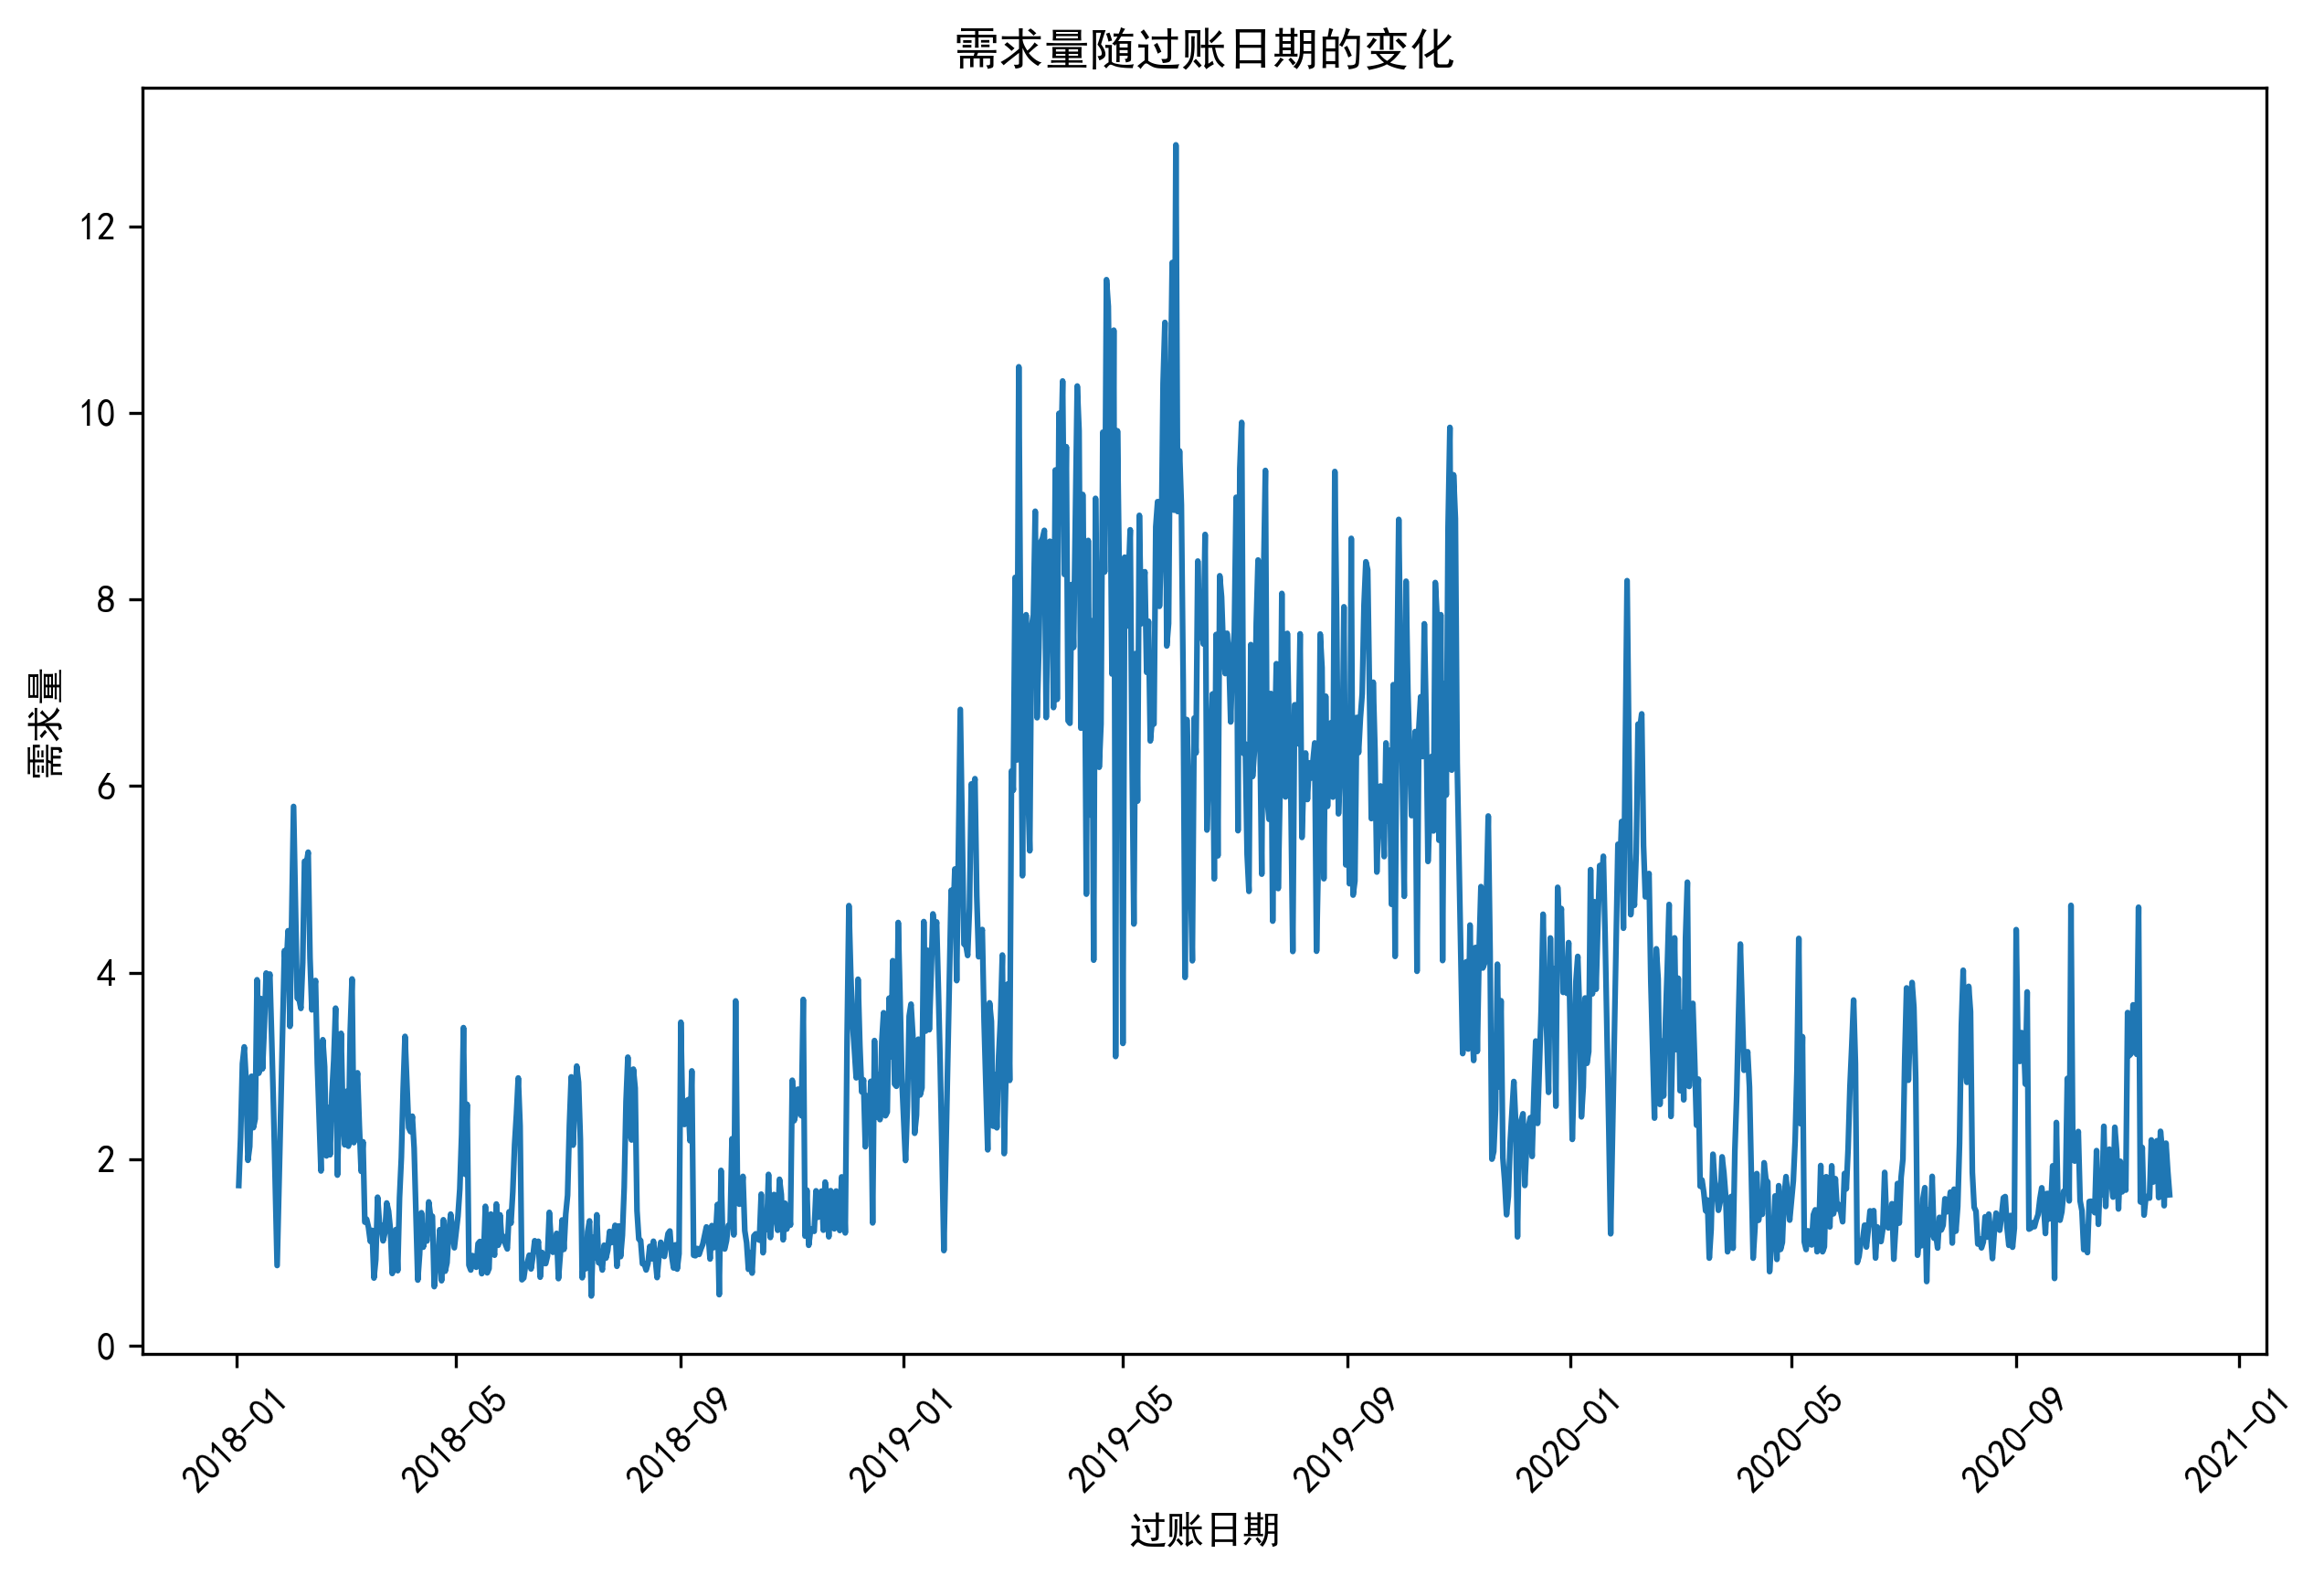

In [22]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(data['过账日期'], data['需求量'])
plt.title('需求量随过账日期的变化')
plt.xlabel('过账日期')
plt.ylabel('需求量')
plt.xticks(rotation=45)
plt.show()

In [23]:
data

,过账日期,需求量,日期间隔
0,2018-01-02,1.717619,NaT
1,2018-01-03,2.231053,1 days
2,2018-01-04,3.022308,1 days
3,2018-01-05,3.203214,1 days
4,2018-01-06,2.850000,1 days
...,...,...,...
1023,2020-11-20,2.087500,1 days
1024,2020-11-21,1.500759,1 days
1025,2020-11-22,2.171176,1 days
1026,2020-11-23,1.869302,1 days


In [71]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# 只保留需求量列
demand = data["需求量"]

# 定义滑动窗口函数（原始切片逻辑存在问题）
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 实际应为 data[i:i+seq_length]
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# 设置滑动窗口长度(用前面5天的数据预测后一天)
seq_length = 5

# 创建序列数据（结果可能不符合预期）
X, y = create_sequences(demand, seq_length)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 818, number of used features: 5
[LightGBM] [Info] Start training from score 3.792742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

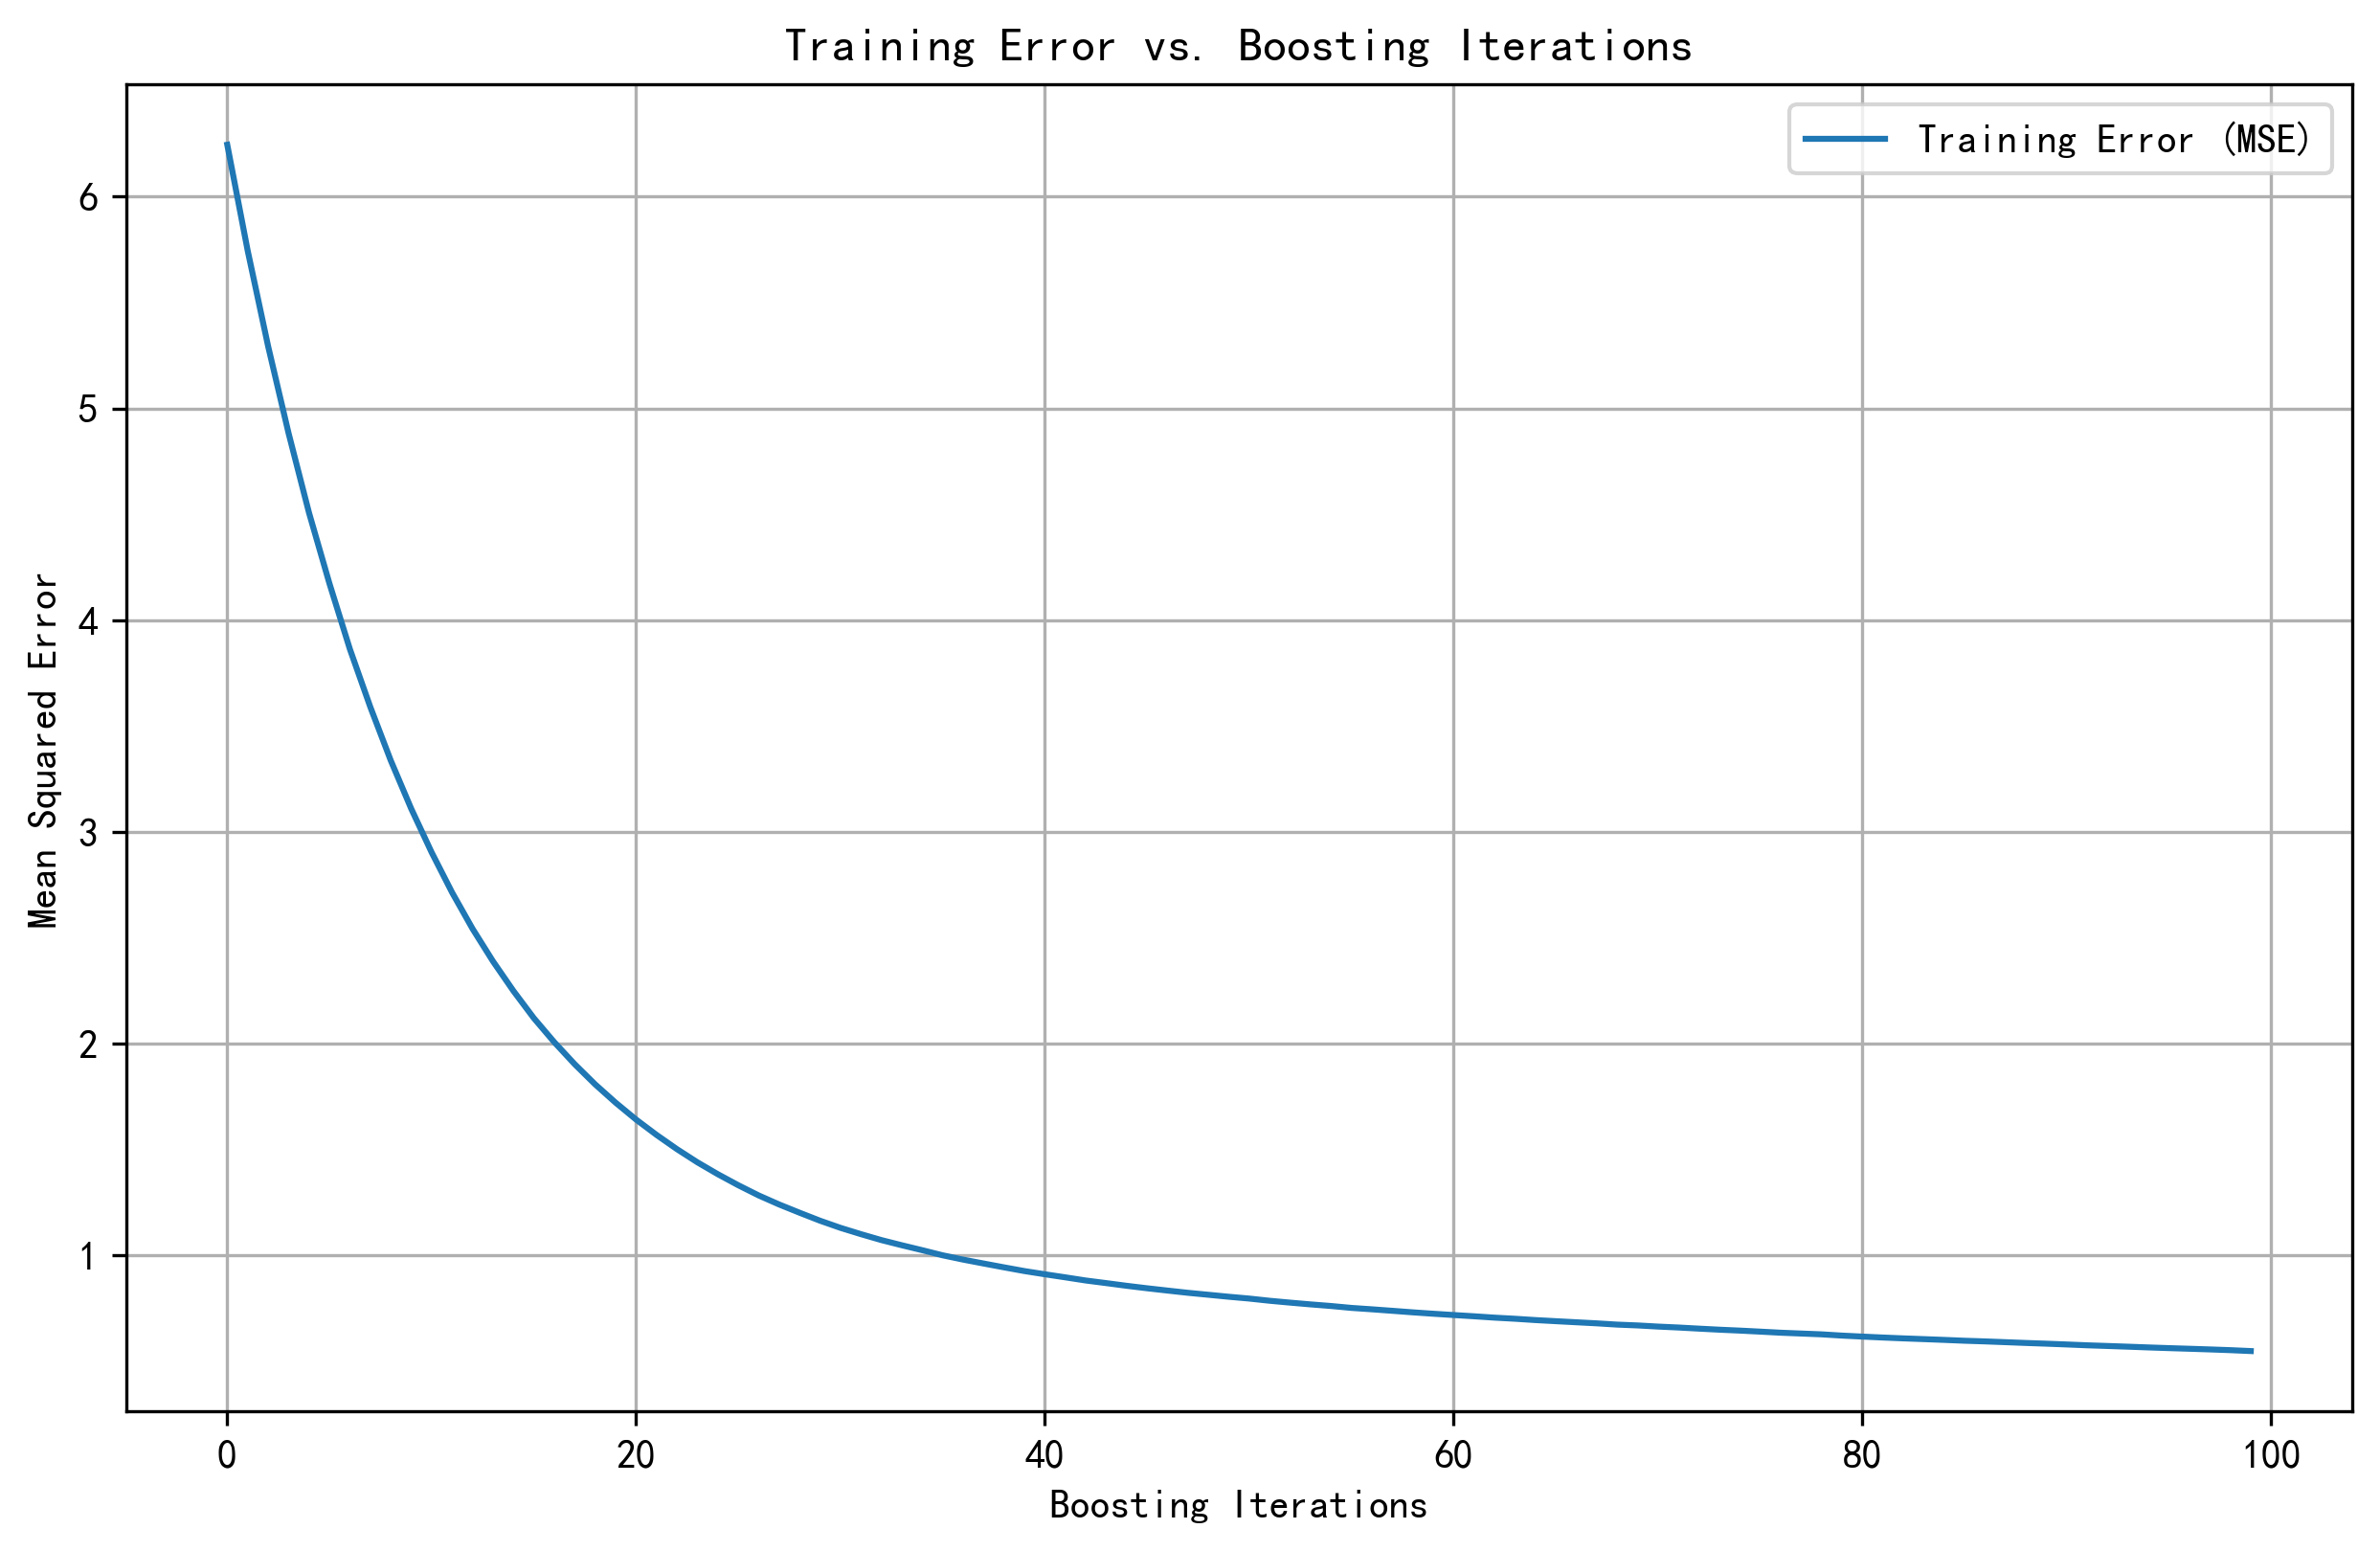

In [72]:
# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 创建 LightGBM 数据集
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# 基于梯度单边采样的 GOSS 算法的LightGBM
import lightgbm as lgb  # 注意：包名拼写错误（正确应为 lightgbm）
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 设置 LightGBM 参数，启用 GOSS 算法
# params = {
#     'objective': 'regression',
#     'metric': ['nae', 'nae'],  # 指标名称错误（应为 mae）
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'boosting_type': 'goss',  # 启用 GOSS 算法
#     'top_rate': 0.2,  # 大梯度数据的比例
#     'other_rate': 0.1  # 小梯度数据的采样比例
# }

# # 训练模型
# num_round = 100

# # 定义回调函数来记录评估结果
# evals_result = {} 

# model = lgb.train(params, train_data, num_round, valid_sets=[test_data],
#                  callbacks=[lgb.record_evaluation(evals_result)])  # 参数括号不匹配


model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    #boosting_type = 'goss',
    #objective = 'regression'
)
eval_result = {}  # 用于保存评估结果

model.fit(
    X_train,
    y_train, 
    eval_set=[(X_train, y_train)],  # 监控训练集误差
    eval_metric='l2',  # 使用MSE（L2损失）
    callbacks=[lgb.record_evaluation(eval_result)],  # 记录评估结果
    )

# 提取训练误差数据
train_error = eval_result['training']['l2']

# 绘制训练误差曲线
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Training Error (MSE)')
plt.title('Training Error vs. Boosting Iterations')
plt.xlabel('Boosting Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE = {mse}, MAE = {mae}')

MSE = 0.532094124011919, MAE = 0.5147784852196476


C:\Users\taoda\Desktop\maze\mse-material-predict\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


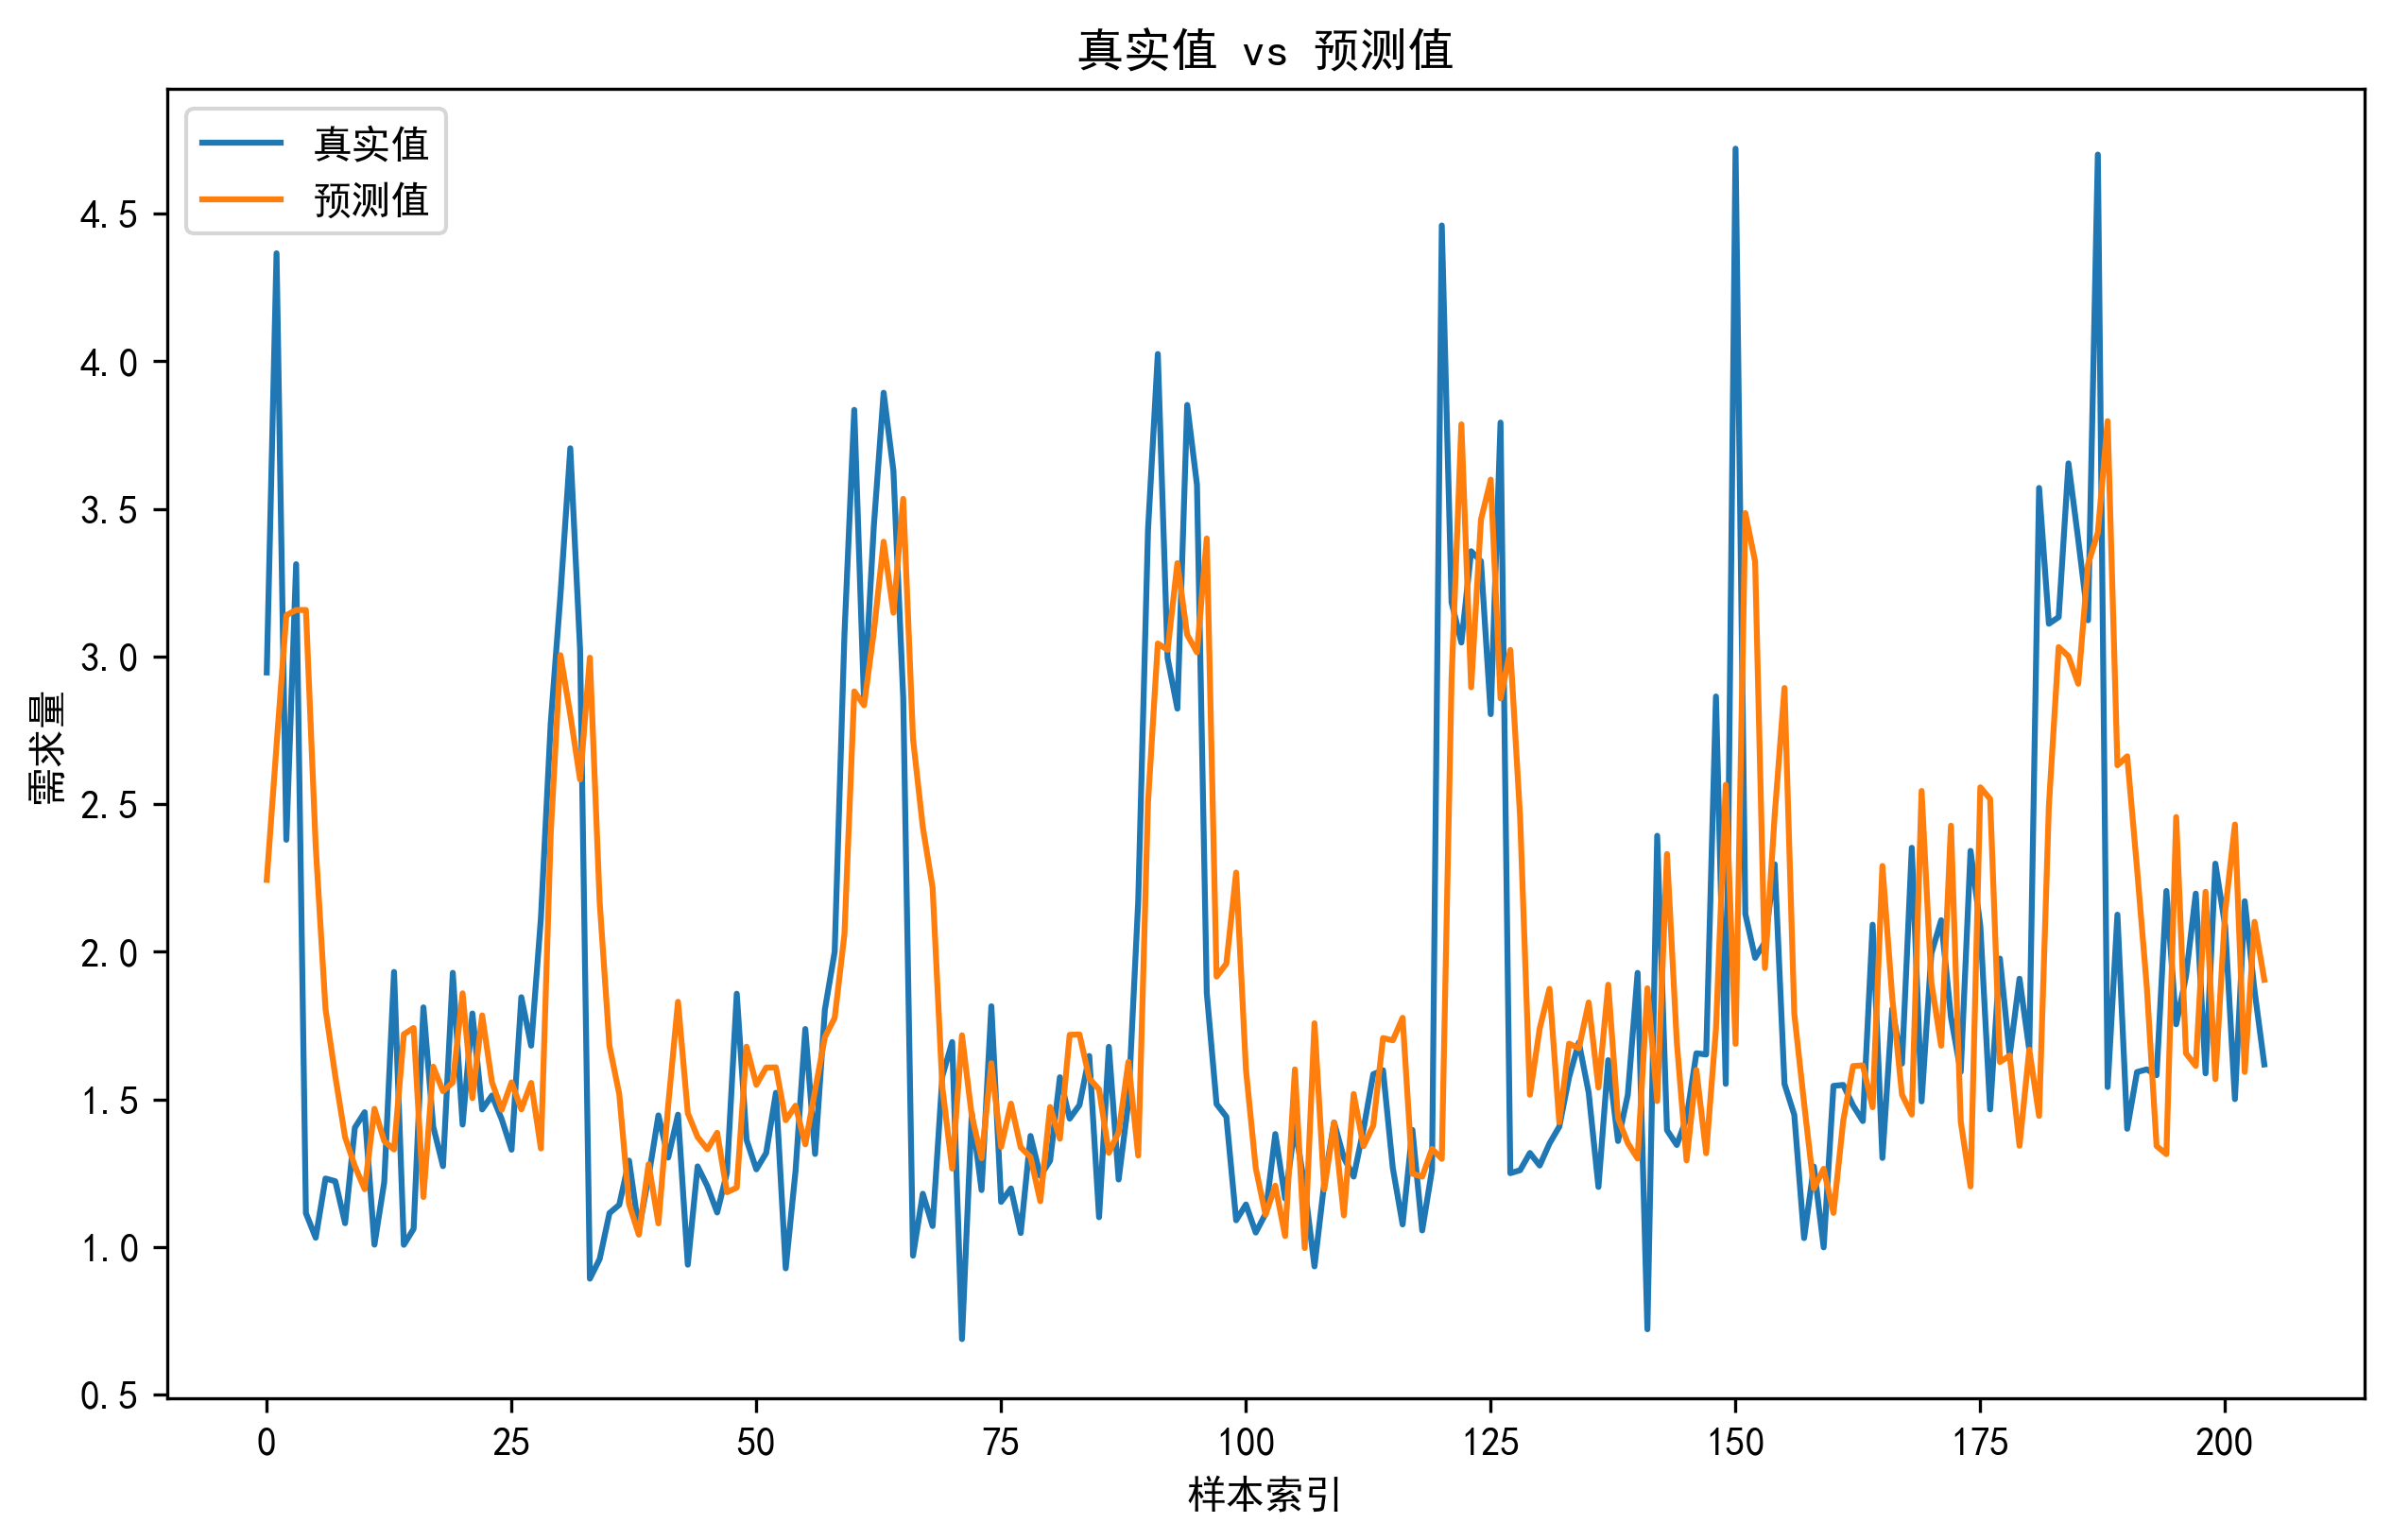

In [74]:
### 7.2. 绘制真实值和预测值的对比图

plt.figure(figsize=(10, 6))

plt.plot(y_test, label="真实值")
plt.plot(y_pred, label="预测值")

plt.title("真实值 vs 预测值")
plt.xlabel("样本索引")
plt.ylabel("需求量")
plt.legend()

plt.show()